In [1]:
import numpy as np
import tensorflow as tf
import tempfile
import zipfile

In [2]:
temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory '/tmp/tmps06pn91l'>


In [3]:
with zipfile.ZipFile('dataset.zip', 'r') as zip:
    zip.extractall(temp_dir.name)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, InputLayer, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
rede_neural = Sequential()
rede_neural.add(InputLayer(input_shape=(64,64,3)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dropout(0.2))

rede_neural.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [46]:
rede_neural.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [47]:
rede_neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7, horizontal_flip=True, shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)

In [49]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [50]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_dir.name}/dataset/training_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 4000 images belonging to 2 classes.


In [51]:
base_teste = gerador_teste.flow_from_directory(f'{temp_dir.name}/dataset/test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [53]:
rede_neural.fit(base_treinamento, epochs=30, validation_data = base_teste)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - accuracy: 0.5886 - loss: 0.7492 - val_accuracy: 0.5290 - val_loss: 0.8608
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 293ms/step - accuracy: 0.6598 - loss: 0.6233 - val_accuracy: 0.5350 - val_loss: 1.0746
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.6858 - loss: 0.5965 - val_accuracy: 0.5750 - val_loss: 0.6987
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 282ms/step - accuracy: 0.6868 - loss: 0.5935 - val_accuracy: 0.5890 - val_loss: 0.9918
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 291ms/step - accuracy: 0.7136 - loss: 0.5512 - val_accuracy: 0.6450 - val_loss: 0.6398
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - accuracy: 0.7221 - loss: 0.5313 - val_accuracy: 0.6870 - val_loss: 0.6244
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 282ms/step - accuracy: 0.7348 - loss: 0.5204 - val_accuracy: 0.6890 - val_loss: 0.5856
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.7628 - loss: 0

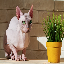

In [74]:
imagem_teste = image.load_img('/pelado.jpg', target_size=(64, 64))
imagem_teste

In [75]:

imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis=0)
previsao = rede_neural.predict(imagem_teste)
previsao = (previsao > 0.5).astype("int32")
if previsao == 0:
  print('cachorro')
else:
  print('gato')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
gato
